In [9]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [10]:
%load_ext autoreload
%autoreload 2

from rdkit import RDLogger
from utils import conf_from_yaml, generator_from_conf
RDLogger.DisableLog('rdApp.*') # use debug: true to log invalid mols

def generate_and_analyze(generator, conf):
    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    generator.plot(**conf.get("plot_args", {}))
    generator.analyze()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


seed: 1752851804
c:\Document\Repos\molgen\sandbox\..\transition\rnn.py:138: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(os.path.join(model_dir, "model.p

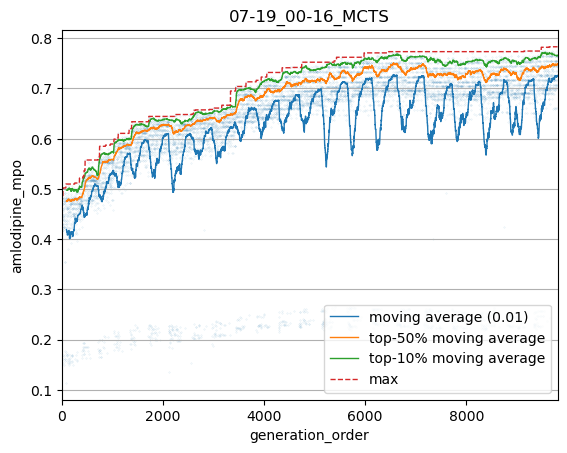

number of generated nodes: 9800
valid rate: 0.9990824752778061
unique rate: 1.0
node_per_sec: 38.366562412726985
best_reward: 0.7830756969602691
average_reward: 0.6214597000779215
top_10_auc: 0.6875579635997713


In [12]:
# start generation

yaml_path_1 = "config/chain/de_novo_rnn.yaml"
yaml_path_2 = "config/chain/lead_jensen.yaml"

conf_1 = conf_from_yaml(yaml_path_1, repo_root)
generator_1 = generator_from_conf(conf_1, repo_root)
generator_1.generate(max_generations=conf_1.get("max_generations"), time_limit=conf_1.get("time_limit"))

conf_2 = conf_from_yaml(yaml_path_2, repo_root)
generator_2 = generator_from_conf(conf_2, predecessor=generator_1, n_top_keys_to_pass=conf_1.get("n_keys_to_pass", 3))
generator_2.generate(max_generations=conf_2.get("max_generations"), time_limit=conf_2.get("time_limit"))

generator_2.plot(**conf_2.get("plot_args", {}))
generator_2.analyze()

# queue_generations(c1, c2)

In [ ]:
# continue generation
generator_2.generate(time_limit=100, max_generations=100)
generator_2.plot(**conf_2.get("plot_args", {}))
generator_2.analyze()

In [ ]:
#save mcts
save_path = generator_2.output_dir() + "save.mcts"
generator_2.save(save_path)

In [ ]:
#load generator and yaml
from generator import Generator
load_dir = "generation_result/06-26_08-51/"
conf_3 = conf_from_yaml("sandbox/" + load_dir + "setting.yaml", repo_root)
generator_3 = generator_from_conf(conf_3, repo_root)
generator_3 = Generator.load(load_dir + "save.mcts", generator_3.transition)